# **Penting**
- Jangan mengubah atau menambahkan cell text yang sudah disediakan, Anda hanya perlu mengerjakan cell code yang sudah disediakan.
- Pastikan seluruh kriteria memiliki output yang sesuai, karena jika tidak ada output dianggap tidak selesai.
- Misal, Anda menggunakan df = df.dropna() silakan gunakan df.isnull().sum() sebagai tanda sudah berhasil. Silakan sesuaikan seluruh output dengan perintah yang sudah disediakan.
- Pastikan Anda melakukan Run All sebelum mengirimkan submission untuk memastikan seluruh cell berjalan dengan baik.
- Pastikan Anda menggunakan variabel df dari awal sampai akhir dan tidak diperbolehkan mengganti nama variabel tersebut.
- Hapus simbol pagar (#) pada kode yang bertipe komentar jika Anda menerapkan kriteria tambahan
- Biarkan simbol pagar (#) jika Anda tidak menerapkan kriteria tambahan
- Pastikan Anda mengerjakan sesuai section yang sudah diberikan tanpa mengubah judul atau header yang disediakan.

# **INFORMASI DATASET**

Dataset ini menyajikan gambaran mendalam mengenai perilaku transaksi dan pola aktivitas keuangan, sehingga sangat ideal untuk eksplorasi **deteksi penipuan (fraud detection)** dan **identifikasi anomali**. Dataset ini mencakup **2.512 sampel data transaksi**, yang mencakup berbagai atribut transaksi, demografi nasabah, dan pola penggunaan.

Setiap entri memberikan wawasan komprehensif terhadap perilaku transaksi, memungkinkan analisis untuk **keamanan finansial** dan pengembangan model prediktif.

## Fitur Utama

- **`TransactionID`**: Pengidentifikasi unik alfanumerik untuk setiap transaksi.  
- **`AccountID`**: ID unik untuk setiap akun, dapat memiliki banyak transaksi.  
- **`TransactionAmount`**: Nilai transaksi dalam mata uang, mulai dari pengeluaran kecil hingga pembelian besar.  
- **`TransactionDate`**: Tanggal dan waktu transaksi terjadi.  
- **`TransactionType`**: Tipe transaksi berupa `'Credit'` atau `'Debit'`.  
- **`Location`**: Lokasi geografis transaksi (nama kota di Amerika Serikat).  
- **`DeviceID`**: ID perangkat yang digunakan dalam transaksi.  
- **`IP Address`**: Alamat IPv4 yang digunakan saat transaksi, dapat berubah untuk beberapa akun.  
- **`MerchantID`**: ID unik merchant, menunjukkan merchant utama dan anomali transaksi.  
- **`AccountBalance`**: Saldo akun setelah transaksi berlangsung.  
- **`PreviousTransactionDate`**: Tanggal transaksi terakhir pada akun, berguna untuk menghitung frekuensi transaksi.  
- **`Channel`**: Kanal transaksi seperti `Online`, `ATM`, atau `Branch`.  
- **`CustomerAge`**: Usia pemilik akun.  
- **`CustomerOccupation`**: Profesi pengguna seperti `Dokter`, `Insinyur`, `Mahasiswa`, atau `Pensiunan`.  
- **`TransactionDuration`**: Lama waktu transaksi (dalam detik).  
- **`LoginAttempts`**: Jumlah upaya login sebelum transaksi—jumlah tinggi bisa mengindikasikan anomali.

Tugas kamu adalah membuat model clustering yang selanjutnya akan digunakan untuk membuat model klasifikasi.


# **1. Import Library**
Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning. Semua library yang dibutuhkan harus **import** di **cell** ini, jika ada library yang dijalankan di cell lain maka **submission langsung ditolak**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder

from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

import joblib
from sklearn.decomposition import PCA

# **2. Memuat Dataset**
Pada tahap ini, Anda perlu memuat dataset ke dalam notebook lalu mengecek informasi dataset sebelum nantinya dilakukan pembersihan. Hal-hal yang perlu dilakukan pada tahapan ini yaitu:
1. **Memahami Struktur Data**
   - Dataset harus mengambil referensi wajib digunakan (bisa dilihat [Disini](https://drive.google.com/drive/folders/1Zs7VmPZ-jNwsRlMKH65Ea-LApSwx6lKx?usp=drive_link))
   - Melakukan loading dataset ke dalam notebook dan menampilkan 5 baris pertama dengan function `head`.
   - Tinjau jumlah baris kolom dan jenis data dalam dataset dengan function `info`.  
   - Menampilkan statistik deskriptif dataset dengan menjalankan `describe`.
   - Pastikan **setiap function tersebut** memiliki **output pada setiap cell** code. Jika tidak **submission langsung ditolak**
   

Gunakan code ini untuk melakukan load data secara otomatis tanpa harus download data tersebut secara manual:
```python
url='https://docs.google.com/spreadsheets/d/e/2PACX-1vTbg5WVW6W3c8SPNUGc3A3AL-AG32TPEQGpdzARfNICMsLFI0LQj0jporhsLCeVhkN5AoRsTkn08AYl/pub?output=csv'
df = pd.read_csv(url)
```

Penting: pada kriteria pertama hindari penggunaan print() dan display() karena seluruh fungsi yang digunakan sudah memiliki standar output dan menghasilkan output yang diharapkan.

Kriteria 1 akan ditolak ketika:
- print(__.head())
- display(___.head())
dst

Kriteria 1 akan diterima ketika Anda menggunakan fungsi yang diminta tanpa menambahkan deskripsi apapun.

In [2]:
# Load data
url='https://docs.google.com/spreadsheets/d/e/2PACX-1vTbg5WVW6W3c8SPNUGc3A3AL-AG32TPEQGpdzARfNICMsLFI0LQj0jporhsLCeVhkN5AoRsTkn08AYl/pub?output=csv'
df = pd.read_csv(url)

In [3]:
# Tampilkan 5 baris pertama dengan function head.
df.head()

,TransactionID,AccountID,TransactionAmount,PreviousTransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,TransactionDate
0,TX000001,AC00128,14.09,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,70.0,Doctor,81.0,1.0,5112.21,2024-11-04 8:08:08
1,TX000002,AC00455,376.24,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,68.0,Doctor,141.0,1.0,13758.91,2024-11-04 8:09:35
2,TX000003,AC00019,126.29,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,19.0,Student,56.0,1.0,1122.35,2024-11-04 8:07:04
3,TX000004,AC00070,184.50,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,26.0,Student,25.0,1.0,8569.06,2024-11-04 8:09:06
4,TX000005,AC00411,13.45,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,NaN,Student,198.0,1.0,7429.40,2024-11-04 8:06:39


In [4]:
# Tinjau jumlah baris kolom dan jenis data dalam dataset dengan info.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2537 entries, 0 to 2536
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TransactionID            2508 non-null   object 
 1   AccountID                2516 non-null   object 
 2   TransactionAmount        2511 non-null   float64
 3   PreviousTransactionDate  2509 non-null   object 
 4   TransactionType          2507 non-null   object 
 5   Location                 2507 non-null   object 
 6   DeviceID                 2507 non-null   object 
 7   IP Address               2517 non-null   object 
 8   MerchantID               2514 non-null   object 
 9   Channel                  2510 non-null   object 
 10  CustomerAge              2519 non-null   float64
 11  CustomerOccupation       2514 non-null   object 
 12  TransactionDuration      2511 non-null   float64
 13  LoginAttempts            2516 non-null   float64
 14  AccountBalance          

In [5]:
# Menampilkan statistik deskriptif dataset dengan menjalankan describe
df.describe()

,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance
count,2511.000000,2519.000000,2511.000000,2516.000000,2510.000000
mean,297.656468,44.678444,119.422939,1.121622,5113.438124
std,292.230367,17.837359,70.078513,0.594469,3897.975861
min,0.260000,18.000000,10.000000,1.000000,101.250000
25%,81.310000,27.000000,63.000000,1.000000,1504.727500
50%,211.360000,45.000000,112.000000,1.000000,4734.110000
75%,413.105000,59.000000,161.000000,1.000000,7672.687500
max,1919.110000,80.000000,300.000000,5.000000,14977.990000


(Opsional) Memuat Dataset dan Melakukan Exploratory Data Analysis (EDA) [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

**Apabila ingin menerapkan Advanced, pastikan seluruh visualisasi tidak ada yang overlap**

In [6]:
# Menampilkan korelasi antar fitur (Opsional Skilled 1)
numCols = df.select_dtypes(include=[np.number]).columns.tolist()
catCols = df.select_dtypes(include=['object', 'datetime']).columns.tolist()

In [7]:
numCols

['TransactionAmount',
 'CustomerAge',
 'TransactionDuration',
 'LoginAttempts',
 'AccountBalance']

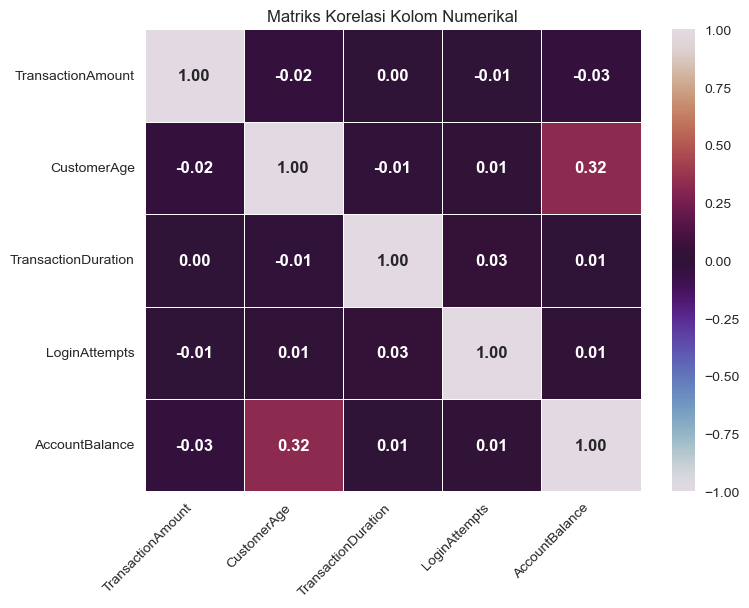

In [8]:
plt.figure(figsize=(8,6))

numDf = df[numCols]
corr = numDf.corr(numeric_only=True)

sns.heatmap(corr,
            annot=True,
            cmap='twilight',
            vmin=-1,
            vmax=1, 
            center=0,
            fmt='.2f', annot_kws={'size': 12, 'weight': 'bold'}, 
            linewidths=0.5, 
            linecolor='white')

plt.title("Matriks Korelasi Kolom Numerikal")
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(rotation=0, fontsize=10)
plt.show()

- Beberapa korelasi terlihat lemah (mendekati 0), yang berarti setiap fitur kebanyakan independen (tidak ada indikasi multikolinearitas). Korelasi paling kuat ada pada AccountBalance dan CustomerAge (0.32), yang berarti umur mempengaruhi banyaknya tabungan.
- Korelasi yang rendah antara beberapa fitur menunjukkan bahwa fitur fitur ini cocok digunakan untuk mendeteksi anomali pada analisis fraud nantinya. Hal ini karena setiap fitur memiliki informasi unik dan independen.

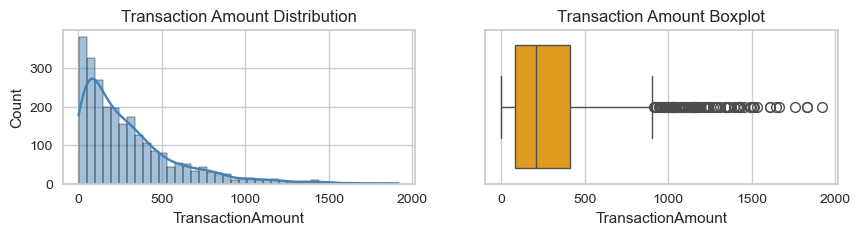

count    2511.000000
mean      297.656468
std       292.230367
min         0.260000
25%        81.310000
50%       211.360000
75%       413.105000
max      1919.110000
Name: TransactionAmount, dtype: float64
Skewness: 1.74, Kurtosis: 3.63



In [9]:
# Menampilkan histogram untuk semua kolom numerik (Opsional Skilled 1)
fig, axes = plt.subplots(1, 2, figsize=(10,2))
sns.histplot(df['TransactionAmount'], kde=True, bins=40, ax=axes[0], color="steelblue")
axes[0].set_title(f"Transaction Amount Distribution")
sns.boxplot(x=df['TransactionAmount'], ax=axes[1], color="orange")
axes[1].set_title(f"Transaction Amount Boxplot")
plt.show()
print(df['TransactionAmount'].describe().T)
print(f"Skewness: {df['TransactionAmount'].skew():.2f}, Kurtosis: {df['TransactionAmount'].kurt():.2f}\n")

Transaksi dengan nilai tinggi (>$1,500) langka dan bisa diindikasikan sebagai kemungkinan fraud. Dari pattern (pola) yang ada, konsentrasi transaksi pada jumlah besar bisa mempermudah dalam melacak anomali. Untuk jumlah yang dianggap anomali akan kita buat pada angka di atas 95th persentil, pada clustering K-Means.

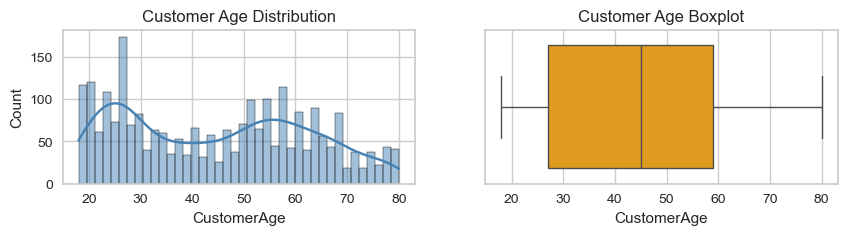

count    2519.000000
mean       44.678444
std        17.837359
min        18.000000
25%        27.000000
50%        45.000000
75%        59.000000
max        80.000000
Name: CustomerAge, dtype: float64
Skewness: 0.15, Kurtosis: -1.22



In [10]:
fig, axes = plt.subplots(1, 2, figsize=(10,2))
sns.histplot(df['CustomerAge'], kde=True, bins=40, ax=axes[0], color="steelblue")
axes[0].set_title(f"Customer Age Distribution")
sns.boxplot(x=df['CustomerAge'], ax=axes[1], color="orange")
axes[1].set_title(f"Customer Age Boxplot")
plt.show()
print(df['CustomerAge'].describe().T)
print(f"Skewness: {df['CustomerAge'].skew():.2f}, Kurtosis: {df['CustomerAge'].kurt():.2f}\n")

Usia customer bervariasi dari 18 tahun sampai 80 tahun dengan rata rata 44 tahun, menandakan bahwa sebagian besar customer sudah cukup dewasa. Standar deviasi 17 mengkonfirmasi bahwa usia pelanggan sangat beragam dan tersebar luas di seluruh rentang tersebut, tidak hanya terkonsentrasi di sekitar usia rata-rata. Keberagaman usia ini dapat dijadikan segmentasi untuk mengeksplorasi tren transaksi pada setiap kelompok usia.

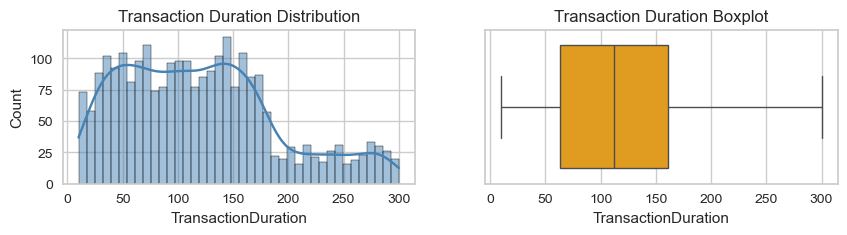

count    2511.000000
mean      119.422939
std        70.078513
min        10.000000
25%        63.000000
50%       112.000000
75%       161.000000
max       300.000000
Name: TransactionDuration, dtype: float64
Skewness: 0.61, Kurtosis: -0.25



In [11]:
fig, axes = plt.subplots(1, 2, figsize=(10,2))
sns.histplot(df['TransactionDuration'], kde=True, bins=40, ax=axes[0], color="steelblue")
axes[0].set_title(f"Transaction Duration Distribution")
sns.boxplot(x=df['TransactionDuration'], ax=axes[1], color="orange")
axes[1].set_title(f"Transaction Duration Boxplot")
plt.show()
print(df['TransactionDuration'].describe().T)
print(f"Skewness: {df['TransactionDuration'].skew():.2f}, Kurtosis: {df['TransactionDuration'].kurt():.2f}\n")

Durasi transaksi berada pada rata rata 119 detik. Standar deviasi 70 mengkonfirmasi bahwa adanya fluktuasi durasi transaksi pada beberapa transaksi, sehingga menghasilkan standar deviasi yang cukup besar. Perubahan durasi transaksi ini dapat menjadi sebuah hal mencurigakan yang perlu diawasi.

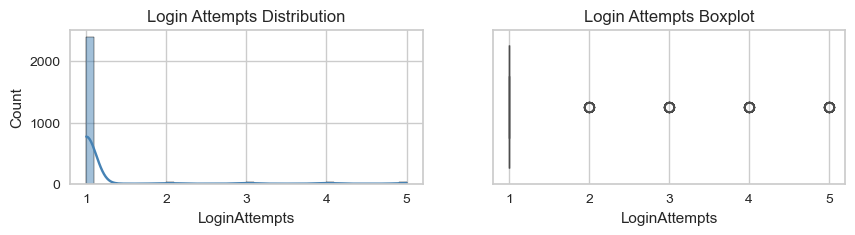

count    2516.000000
mean        1.121622
std         0.594469
min         1.000000
25%         1.000000
50%         1.000000
75%         1.000000
max         5.000000
Name: LoginAttempts, dtype: float64
Skewness: 5.24, Kurtosis: 27.46



In [12]:
fig, axes = plt.subplots(1, 2, figsize=(10,2))
sns.histplot(df['LoginAttempts'], kde=True, bins=40, ax=axes[0], color="steelblue")
axes[0].set_title(f"Login Attempts Distribution")
sns.boxplot(x=df['LoginAttempts'], ax=axes[1], color="orange")
axes[1].set_title(f"Login Attempts Boxplot")
plt.show()
print(df['LoginAttempts'].describe().T)
print(f"Skewness: {df['LoginAttempts'].skew():.2f}, Kurtosis: {df['LoginAttempts'].kurt():.2f}\n")

Ada indikasi outlier pada percobaan login, didukung dengan rata rata percobaan login sebesar 1.12. Variasi sebaran data tidak terlalu banyak dengan standar deviasi 0.6 yang sejalan juga dengan kebanyakan login attempt berada pada sekali percobaan. Percobaan login yang banyak (>3) dapat diindikasikan sebagai tindakan yang mencurigakan.

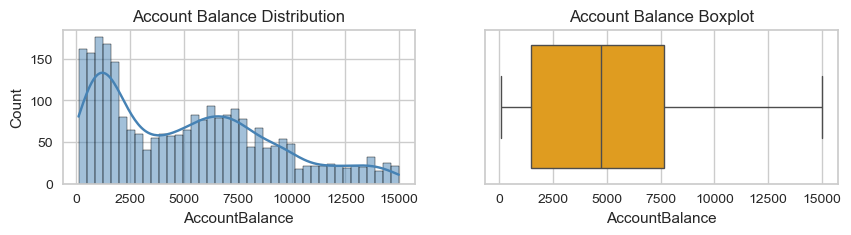

count     2510.000000
mean      5113.438124
std       3897.975861
min        101.250000
25%       1504.727500
50%       4734.110000
75%       7672.687500
max      14977.990000
Name: AccountBalance, dtype: float64
Skewness: 0.60, Kurtosis: -0.57



In [13]:
fig, axes = plt.subplots(1, 2, figsize=(10,2))
sns.histplot(df['AccountBalance'], kde=True, bins=40, ax=axes[0], color="steelblue")
axes[0].set_title(f"Account Balance Distribution")
sns.boxplot(x=df['AccountBalance'], ax=axes[1], color="orange")
axes[1].set_title(f"Account Balance Boxplot")
plt.show()
print(df['AccountBalance'].describe().T)
print(f"Skewness: {df['AccountBalance'].skew():.2f}, Kurtosis: {df['AccountBalance'].kurt():.2f}\n")

Standar deviasi 3897 menunjukkan variasi yang sangat banyak pada Account Balance setiap user. Account Balance juga pasti mempengaruhi aktivitas transaksi, seorang yang memiliki balance $500, besar kemungkinan tidak akan melakukan transaksi $400 dalam satu waktu secara tiba tiba. 

In [14]:
catCols

['TransactionID',
 'AccountID',
 'PreviousTransactionDate',
 'TransactionType',
 'Location',
 'DeviceID',
 'IP Address',
 'MerchantID',
 'Channel',
 'CustomerOccupation',
 'TransactionDate']

In [15]:
catCols = [
    'TransactionType',
    'Location',
    'Channel',
    'CustomerOccupation',
]

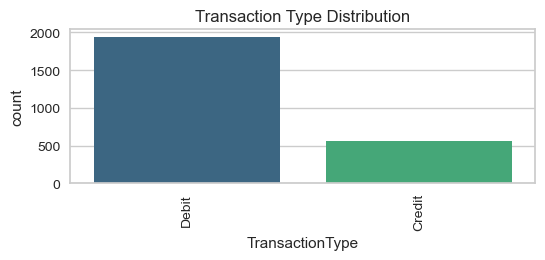

In [16]:
plt.figure(figsize=(6,2))
data = df['TransactionType'].value_counts().index
sns.countplot(x=df['TransactionType'], data=df, order=data, hue=df['TransactionType'], palette="viridis", legend=False)
plt.title(f"Transaction Type Distribution")
plt.xticks(rotation=90)
plt.show()

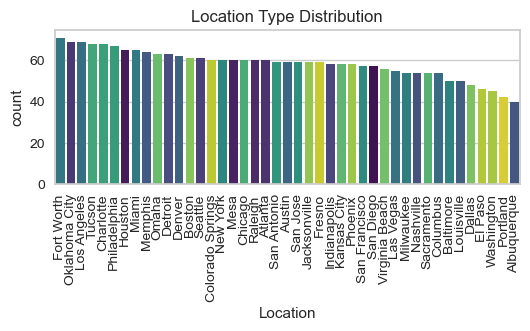

In [17]:
plt.figure(figsize=(6,2))
data = df['Location'].value_counts().index
sns.countplot(x=df['Location'], data=df, order=data, hue=df['Location'], palette="viridis", legend=False)
plt.title(f"Location Type Distribution")
plt.xticks(rotation=90)
plt.show()

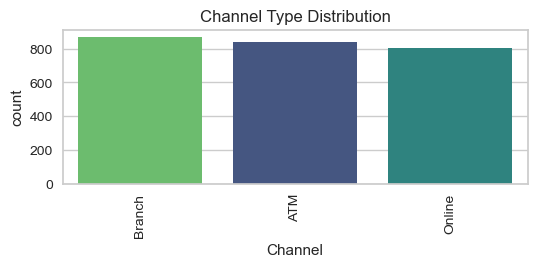

In [18]:
plt.figure(figsize=(6,2))
data = df['Channel'].value_counts().index
sns.countplot(x=df['Channel'], data=df, order=data, hue=df['Channel'], palette="viridis", legend=False)
plt.title(f"Channel Type Distribution")
plt.xticks(rotation=90)
plt.show()

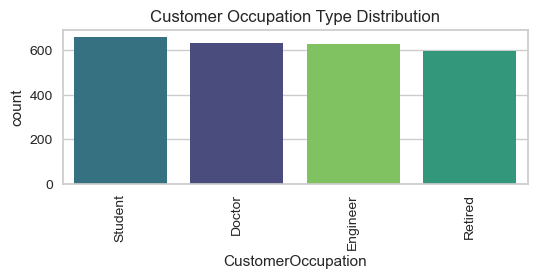

In [19]:
plt.figure(figsize=(6,2))
data = df['CustomerOccupation'].value_counts().index
sns.countplot(x=df['CustomerOccupation'], data=df, order=data, hue=df['CustomerOccupation'], palette="viridis", legend=False)
plt.title(f"Customer Occupation Type Distribution")
plt.xticks(rotation=90)
plt.show()

(Opsional) Memuat Dataset dan Melakukan Exploratory Data Analysis (EDA) [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

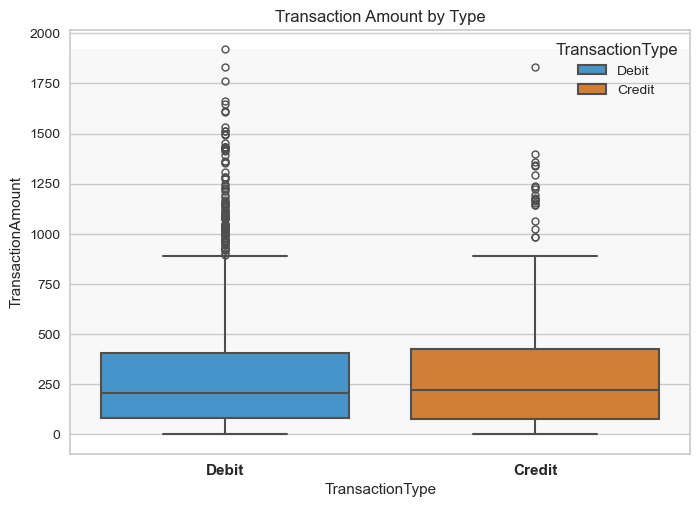

In [20]:
# Visualisasi yang lebih informatif (Opsional Advanced 1)
sns.boxplot(x='TransactionType', y='TransactionAmount', data=df, hue='TransactionType',
            palette=['#3498db', '#e67e22'], linewidth=1.5, fliersize=5, saturation=0.8)
plt.title(f"Transaction Amount by Type")
plt.xticks(fontsize=11, weight='bold')
plt.axhspan(0, df['TransactionAmount'].max(), facecolor='gray', alpha=0.05)
plt.show()

- Nilai transaksi dengan nilai yang jauh di atas kebiasaan pengguna adalah tanda bahaya fraud, di mana penipu mencoba menguras rekening secepat mungkin.
- Outlier pada kredit juga bisa mengindikasikan refund palsu (fraudulent refunds), di mana uang dikembalikan ke kartu yang salah secara sengaja. Hal ini juga bisa menjadi tanda skema pencucian uang (money laundering), di mana kartu kredit digunakan sebagai rekening penampung sementara untuk dana ilegal agar terlihat sah.

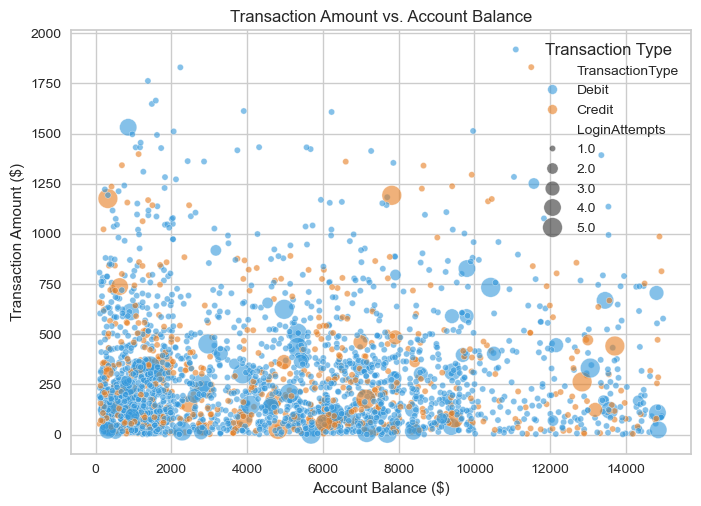

In [21]:
sns.scatterplot(x='AccountBalance', y='TransactionAmount', data=df, hue='TransactionType', 
                palette=['#3498db', '#e67e22'], size='LoginAttempts', sizes=(20, 200), alpha=0.6)
plt.title(f"Transaction Amount vs. Account Balance")
plt.xlabel('Account Balance ($)')
plt.ylabel('Transaction Amount ($)')
plt.legend(title='Transaction Type', fontsize=10)
plt.show()

Dari visualisasi di atas dapat kita temukan hubungan jumlah transaksi dengan balance yang ada. Transaksi dengan jumlah besar namun pada balance kecil (ujung kiri atas) dapat mengindikasikan draining attempts (percobaan menguras dana akun ssecara terus menerus). Titik dengan ukuran lebih besar kemungkinan mengindikasikan fraud.

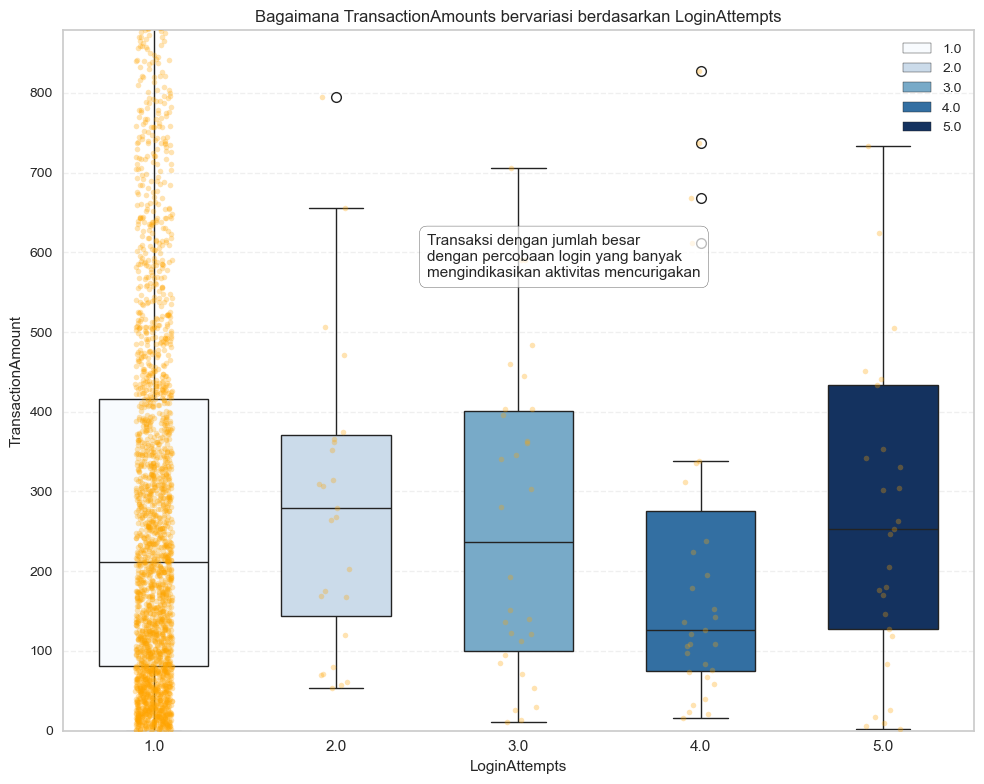

In [22]:
plt.figure(figsize=(10,8))

sns.boxplot(x='LoginAttempts',
            y='TransactionAmount',
            data=df,
            hue='LoginAttempts',
            palette='Blues',
            width=0.6)

sns.stripplot(x='LoginAttempts', 
              y='TransactionAmount', 
              data=df,
              size=4, color='orange', alpha=0.3, jitter=True)

plt.xticks(fontsize=11)
plt.ylim(0, df['TransactionAmount'].quantile(0.95))

plt.annotate('Transaksi dengan jumlah besar\ndengan percobaan login yang banyak\nmengindikasikan aktivitas mencurigakan', 
             xy=(2, df[df['LoginAttempts'] > 1]['TransactionAmount'].median()), 
             xytext=(1.5, df['TransactionAmount'].quantile(0.85)),
             fontsize=11,
             bbox=dict(boxstyle='round,pad=0.5', facecolor='white', alpha=0.7))

plt.title("Bagaimana TransactionAmounts bervariasi berdasarkan LoginAttempts")
plt.grid(axis='y', linestyle='--', alpha=0.3)

plt.tight_layout()
plt.show()

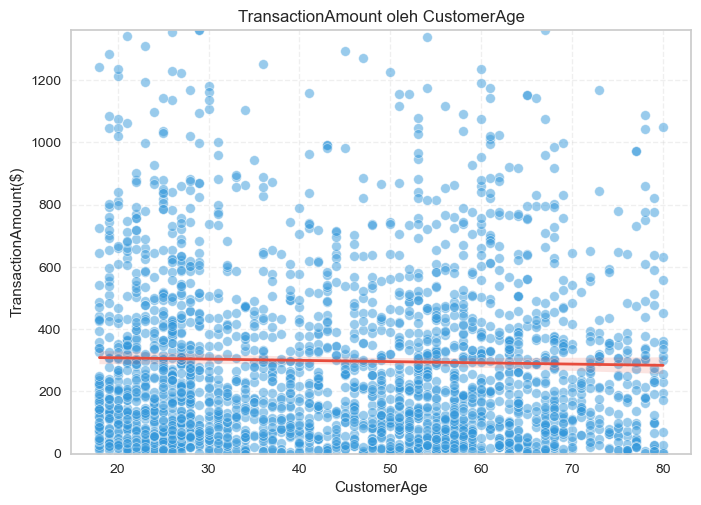

In [23]:
df['AgeGroup'] = pd.cut(df['CustomerAge'], bins=[0, 18, 30, 45, 60, 100], 
                        labels=['0-18', '19-30', '31-45', '46-60', '60+'])

sns.scatterplot(x='CustomerAge', y='TransactionAmount', 
                data=df, color='#3498db', alpha=0.5)

sns.regplot(x='CustomerAge', y='TransactionAmount', data=df, 
            scatter=False, color='#e74c3c', line_kws={'lw': 2})

plt.title('TransactionAmount oleh CustomerAge')
plt.xlabel('CustomerAge')
plt.ylabel('TransactionAmount($)')
plt.ylim(0, df['TransactionAmount'].quantile(0.99))
plt.grid(True, linestyle='--', alpha=0.3)
plt.show()

Dapat kita lihat dari scatter plot pertama, plot regresi tidak menunjukkan adanya tren peningkatan yang mengatakan bahwa 
semakin tinggi usia customer, maka transaksi yang dilakukan semakin besar (ditandai dengan garis merah). 

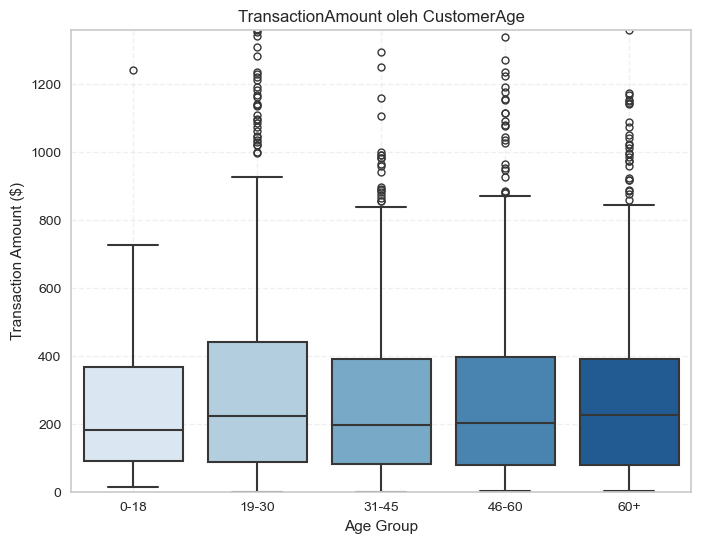

In [24]:
plt.figure(figsize=(8,6))
plt.title('TransactionAmount oleh CustomerAge')
plt.xlabel('Age Group')
plt.ylabel('Transaction Amount ($)')
sns.boxplot(x='AgeGroup', y='TransactionAmount', data=df, hue='AgeGroup', palette='Blues', linewidth=1.5, fliersize=5, legend=False)
plt.grid(True, linestyle='--', alpha=0.3)
plt.ylim(0, df['TransactionAmount'].quantile(0.99))
plt.show()

Pada boxplot juga dapat kita lihat bahwa transaksi pada setiap age group hanya meningkat sedikit saja, bahkan dari umur 19-30 tahun ke umur 31-45 tahun, besar transaksinya menurun. 

Anomali transaksi besar pada umur 60+ patut diwaspadai, hal ini dapat terlihat dari outlier yang sangat banyak pada boxplot di atas. Kelompok usia ini akan sering menjadi target penipuan seperti phishing (email palsu dari bank) atau penipuan melalui telepon. Anomali juga terdapat pada umur 0-18 tahun, dengan adanya sebuah outlier, di mana kelompok usia ini seharusnya jarang melakukan transaksi dengan angka sebesar itu.

# **3. Pembersihan dan Pra Pemrosesan Data**

Pada tahap ini, Anda akan melakukan **Pembersihan Dataset** untuk menjadikan dataset mudah diintepretasi dan bisa dilatih. Hal-hal yang wajib kamu lakukan yaitu:

1. **Mengecek dataset** menggunakan isnull().sum() dan duplicated().sum().
2. Melakukan feature scaling menggunakan `MinMaxScaler()` atau `StandardScalar()` untuk fitur numerik.
3. Melakukan feature encoding menggunakan `LabelEncoder()` untuk fitur kategorikal.
4. Melakukan drop pada kolom id.
5. **Ketentuan Cell Code**
   - Pastikan **setiap pemeriksaan tersebut** memiliki **output pada cell-nya**. Jika tidak **submission langsung ditolak**


In [25]:
# Mengecek dataset menggunakan isnull().sum()
df.isnull().sum()

TransactionID              29
AccountID                  21
TransactionAmount          26
PreviousTransactionDate    28
TransactionType            30
Location                   30
DeviceID                   30
IP Address                 20
MerchantID                 23
Channel                    27
CustomerAge                18
CustomerOccupation         23
TransactionDuration        26
LoginAttempts              21
AccountBalance             27
TransactionDate            24
AgeGroup                   18
dtype: int64

In [26]:
# Mengecek dataset menggunakan duplicated().sum()
df.duplicated().sum()

21

In [27]:
df_copy = df.copy()

In [28]:
# Melakukan feature scaling menggunakan MinMaxScaler() atau StandardScalar() untuk fitur numerik.
# Pastikan kamu menggunakan function head setelah melalukan scaling.
scaler = MinMaxScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df_copy[numCols]), columns=numCols)
df_scaled.head()

,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance
0,0.007207,0.838710,0.244828,0.0,0.336832
1,0.195940,0.806452,0.451724,0.0,0.918055
2,0.065680,0.016129,0.158621,0.0,0.068637
3,0.096016,0.129032,0.051724,0.0,0.569198
4,0.006874,NaN,0.648276,0.0,0.492591


In [29]:
# Melakukan drop pada kolom yang memiliki keterangan id dan IP Address
df_copy.update(df_scaled)
toDrop = ['AccountID', 'DeviceID', 'MerchantID', 'TransactionID', 'IP Address', 'AgeGroup', 'TransactionDate', 'PreviousTransactionDate']
df_copy = df_copy.drop(columns=toDrop)
df_copy.head()

,TransactionAmount,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance
0,0.007207,Debit,San Diego,ATM,0.838710,Doctor,0.244828,0.0,0.336832
1,0.195940,Debit,Houston,ATM,0.806452,Doctor,0.451724,0.0,0.918055
2,0.065680,Debit,Mesa,Online,0.016129,Student,0.158621,0.0,0.068637
3,0.096016,Debit,Raleigh,Online,0.129032,Student,0.051724,0.0,0.569198
4,0.006874,Credit,Atlanta,Online,NaN,Student,0.648276,0.0,0.492591


In [30]:
# Melakukan feature encoding menggunakan LabelEncoder() untuk fitur kategorikal.
# Pastikan kamu menggunakan function head setelah melalukan encoding.
encoders = {}

for col in catCols:
    le = LabelEncoder()
    df_copy[col] = le.fit_transform(df_copy[col])
    encoders[col] = le

df_copy.head()

,TransactionAmount,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance
0,0.007207,1,36,0,0.838710,0,0.244828,0.0,0.336832
1,0.195940,1,15,0,0.806452,0,0.451724,0.0,0.918055
2,0.065680,1,23,2,0.016129,3,0.158621,0.0,0.068637
3,0.096016,1,33,2,0.129032,3,0.051724,0.0,0.569198
4,0.006874,0,1,2,NaN,3,0.648276,0.0,0.492591


In [31]:
# Last checking gunakan columns.tolist() untuk checking seluruh fitur yang ada.
# Perbaiki kode di bawah ini tanpa menambahkan atau mengurangi cell code ini.
df_copy.columns.tolist()

['TransactionAmount',
 'TransactionType',
 'Location',
 'Channel',
 'CustomerAge',
 'CustomerOccupation',
 'TransactionDuration',
 'LoginAttempts',
 'AccountBalance']

(Opsional) Pembersihan dan Pra Pemrosesan Data [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

In [32]:
# Menangani data yang hilang (bisa menggunakan dropna() atau metode imputasi fillna()).
df_copy = df_copy.dropna()

In [33]:
# Menghapus data duplikat menggunakan drop_duplicates().
df_copy = df_copy.drop_duplicates()

(Opsional) Pembersihan dan Pra Pemrosesan Data [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

In [34]:
# Melakukan Handling Outlier Data berdasarkan jumlah outlier, apakah menggunakan metode drop atau mengisi nilai tersebut.
# Outlier diperlukan untuk indikasi fraud, oleh sebab itu tidak akan dilakukan outlier handling

In [35]:
# Melakukan binning data berdasarkan kondisi rentang nilai pada fitur numerik,
# lakukan pada satu sampai dua fitur numerik.
# Silahkan lakukan encode hasil binning tersebut menggunakan LabelEncoder.
# Pastikan kamu mengerjakan tahapan ini pada satu cell.

# **4. Membangun Model Clustering**
Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan.
1. Pastikan Anda menggunakan dataframe yang sudah melalui processing sesuai dengan levelnya (Basic, Skilled, Advanced)
2. Melakukan visualisasi Elbow Method untuk menentukan jumlah cluster terbaik menggunakan `KElbowVisualizer()`.
3. Menggunakan algoritma K-Means Clustering dengan `sklearn.cluster.KMeans()`.
4. Jalankan cell code `joblib.dump(model_kmeans, "model_clustering.h5")` untuk menyimpan model yang sudah dibuat.

In [36]:
# Gunakan describe untuk memastikan proses clustering menggunakan dataset hasil preprocessing
# Lengkapi kode ini dengan mengubah nama DataFrame yang akan dilatih.
# Kode harus digunakan dan dilarang menambahkan syntax lainnya pada cell ini.
df_copy.describe()

,TransactionAmount,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance
count,2397.000000,2397.000000,2397.000000,2397.000000,2397.000000,2397.000000,2397.000000,2397.000000,2397.000000
mean,0.154944,0.788903,21.375887,1.013350,0.429441,1.531498,0.377573,0.030038,0.335439
std,0.151921,0.437774,12.414387,0.831248,0.287683,1.153653,0.242403,0.147088,0.262236
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.042604,1.000000,11.000000,0.000000,0.145161,0.000000,0.182759,0.000000,0.093373
50%,0.110853,1.000000,21.000000,1.000000,0.435484,2.000000,0.351724,0.000000,0.308693
75%,0.214300,1.000000,32.000000,2.000000,0.661290,3.000000,0.524138,0.000000,0.508058
max,1.000000,2.000000,43.000000,3.000000,1.000000,4.000000,1.000000,1.000000,1.000000


In [37]:
df_copy.head()

,TransactionAmount,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance
0,0.007207,1,36,0,0.838710,0,0.244828,0.0,0.336832
1,0.195940,1,15,0,0.806452,0,0.451724,0.0,0.918055
2,0.065680,1,23,2,0.016129,3,0.158621,0.0,0.068637
3,0.096016,1,33,2,0.129032,3,0.051724,0.0,0.569198
5,0.047888,1,28,0,0.000000,3,0.558621,0.0,0.045738


In [38]:
# Melakukan visualisasi Elbow Method menggunakan KElbowVisualizer()
X = df_copy.iloc[:, [0, 8]].values
print(pd.DataFrame(X, columns=['Transaction Amount ($)', 'Account Balance ($)']))

      Transaction Amount ($)  Account Balance ($)
0                   0.007207             0.336832
1                   0.195940             0.918055
2                   0.065680             0.068637
3                   0.096016             0.569198
4                   0.047888             0.045738
...                      ...                  ...
2392                0.014785             0.220590
2393                0.096782             0.112636
2394                0.126545             0.002017
2395                0.006212             0.323188
2396                0.120833             0.442881

[2397 rows x 2 columns]


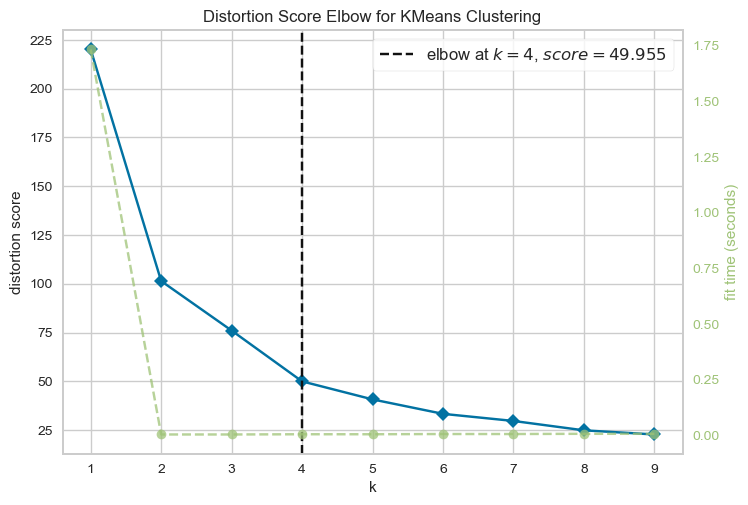

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [39]:
kmeans = KMeans(random_state=42)
visualizer = KElbowVisualizer(kmeans, k=(1, 10))
visualizer.fit(X)
visualizer.show()

Garis biru pada grafik menunjukkan **Distortion Score (Inertia)**, nilai ini adalah ukuran seberapa jauh titik-titik data, dari centroid (pusat) cluster mereka.  
Semakin **rendah** nilai inertia, semakin **baik** (cluster semakin rapat).

- Dari **k = 1 ke k = 2**, terjadi penurunan drastis (sekitar *225 → 100*).  
- Dari **k = 2 ke k = 3**, penurunan masih cukup signifikan (*100 → 75*).  
- Dari **k = 3 ke k = 4**, penurunan tetap terlihat jelas (*75 → 50*).  
- Setelah **k = 4**, garis menjadi jauh lebih landai — penurunan dari *k = 4 ke k = 5* (dan seterusnya) sangat kecil.

**Kesimpulan:**  
Nilai **k = 4** merupakan titik “siku” (*elbow*), yaitu titik di mana penambahan jumlah cluster tidak lagi memberikan pengurangan inertia yang signifikan.  
Dengan kata lain, ini adalah *point of diminishing returns*, sehingga **k = 4** adalah jumlah cluster yang paling optimal.

In [40]:
# Menggunakan algoritma K-Means Clustering
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(X)

labels = kmeans.labels_

k = 4

In [41]:
def analyze_clusters(X, labels, k):
    print("Analisis Karakteristik Setiap Cluster:")
    for cluster_id in range(k):
        # Mengambil data untuk cluster saat ini
        cluster_data = X[labels == cluster_id]
        cluster_data
 
        # Menghitung rata-rata untuk setiap fitur dalam cluster
        mean_income = cluster_data[:, 0].mean()  # Rata-rata Transaction Amount
        mean_account = cluster_data[:, 1].mean()  # Rata-rata Account Balance
 
        print(f"\nCluster {cluster_id + 1}:")
        print(f"Rata-rata Transaction Amount ($): {mean_income:.2f}")
        print(f"Rata-rata Account Balance ($): {mean_account:.2f}")
 
# Analisis karakteristik setiap cluster
analyze_clusters(X, labels, k)

Analisis Karakteristik Setiap Cluster:

Cluster 1:
Rata-rata Transaction Amount ($): 0.47
Rata-rata Account Balance ($): 0.20

Cluster 2:
Rata-rata Transaction Amount ($): 0.16
Rata-rata Account Balance ($): 0.78

Cluster 3:
Rata-rata Transaction Amount ($): 0.10
Rata-rata Account Balance ($): 0.10

Cluster 4:
Rata-rata Transaction Amount ($): 0.11
Rata-rata Account Balance ($): 0.44


Jalankan cell code ini untuk menyimpan model kamu.

In [42]:
# Menyimpan model menggunakan joblib
# import joblib
joblib.dump(kmeans, "model_clustering.h5")

['model_clustering.h5']

(Opsional) Membangun Model Clustering [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

In [43]:
# Menghitung dan menampilkan nilai Silhouette Score.
silhouette_score(X, kmeans.fit_predict(X))

0.4629169388454348

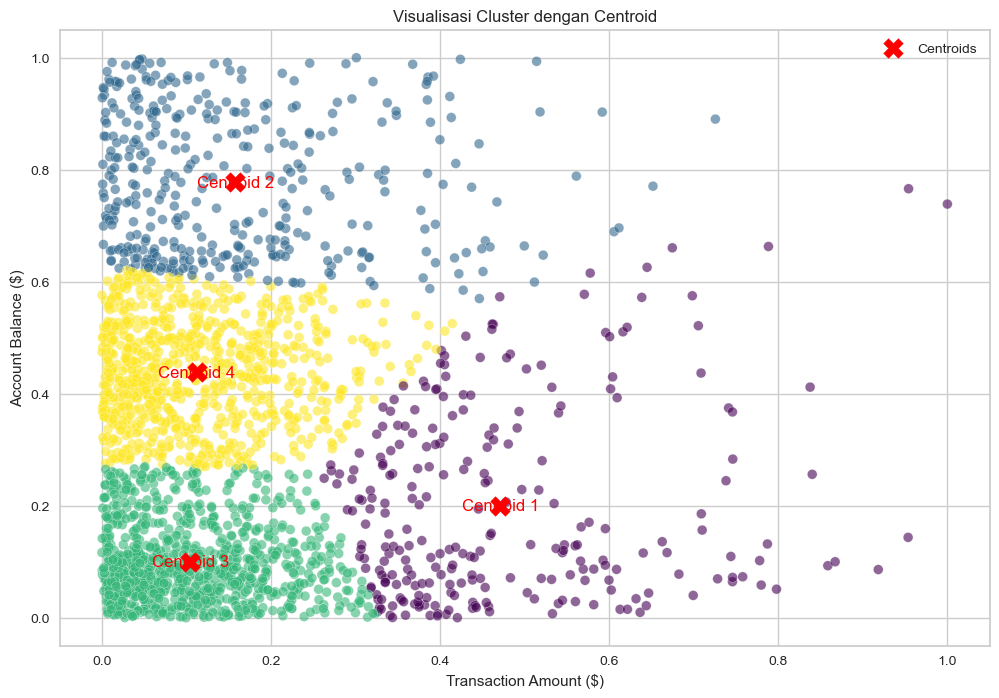

Nilai Centroids:
Centroid 1: Transaction Amount = 0.47, Account Balance = 0.20
Centroid 2: Transaction Amount = 0.16, Account Balance = 0.78
Centroid 3: Transaction Amount = 0.10, Account Balance = 0.10
Centroid 4: Transaction Amount = 0.11, Account Balance = 0.44


In [44]:
# Membuat visualisasi hasil clustering
# Menentukan posisi centroid
centroids = kmeans.cluster_centers_
 
# Visualisasi cluster
plt.figure(figsize=(12, 8))
 
# Plot data
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=50, alpha=0.6, edgecolors='w', marker='o')
 
# Plot centroid
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=200, marker='X', label='Centroids')
 
# Menambahkan label centroid pada plot
for i, centroid in enumerate(centroids):
    plt.text(centroid[0], centroid[1], f'Centroid {i+1}', color='red', fontsize=12, ha='center', va='center')
 
# Menambahkan judul dan label
plt.title('Visualisasi Cluster dengan Centroid')
plt.xlabel('Transaction Amount ($)')
plt.ylabel('Account Balance ($)')
plt.legend()
 
plt.show()
 
# Menampilkan nilai centroid
print("Nilai Centroids:")
for i, centroid in enumerate(centroids):
    print(f"Centroid {i+1}: Transaction Amount = {centroid[0]:.2f}, Account Balance = {centroid[1]:.2f}")

(Opsional) Membangun Model Clustering [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

In [45]:
# Membangun model menggunakan PCA.
X = df_copy
# Inisialisasi PCA dengan 2 komponen
pca = PCA(n_components=2)
# Fit dan transform data X
X_pca = pca.fit_transform(X)
# Menyimpan data PCA sebagai Dataframe dengan nama PCA_<numbers>
df_pca = pd.DataFrame(X_pca, columns=['PC1', 'PC2'], index=X.index)
# Pastikan kamu membangun model Kmeans baru dengan data yang sudah dimodifikasi melalui PCA.
kmeans_pca = KMeans(n_clusters=4, random_state=42, n_init=10)
kmeans_pca.fit(df_pca)

,n_clusters,4
,init,'k-means++'
,n_init,10
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,42
,copy_x,True
,algorithm,'lloyd'


In [46]:
# Simpan model PCA sebagai perbandingan dengan menjalankan cell code ini joblib.dump(model,"PCA_model_clustering.h5")
# Pastikan yang disimpan model yang sudah melalui .fit berdasarkan dataset yang sudah dilakukan PCA
joblib.dump(kmeans_pca, "PCA_model_clustering.h5")

['PCA_model_clustering.h5']

# **5. Interpretasi Cluster**

## **a. Interpretasi Hasil Clustering**
1. **Contoh Interpretasi:**
- **Cluster 1: (Nasabah Bertransaksi dan Pendapatan Besar)**:
  - **Rata-rata (mean) Annual Income:** 0.953 (48,260)
  - **Rata-rata (mean) Spending Score:** 0.8 (56.48)
  - **Analisis:** Cluster ini mencakup pelanggan dengan pendapatan tahunan tinggi dan tingkat pengeluaran yang cukup tinggi. Pelanggan dalam cluster ini cenderung memiliki daya beli yang tinggi dan mereka lebih cenderung untuk membelanjakan sebagian besar pendapatan mereka. Sehingga rekomendasi pada kelompok nasabah ini adalah dengan menawarkan produk-produk investasi atau perbankan yang berkualitas tinggi.


In [ ]:
# Menampilkan analisis deskriptif minimal mean, min dan max untuk fitur numerik.
# Silakan menambahkan fungsi agregasi lainnya untuk experience lebih baik.
# pastikan output menghasilkan agregasi dan groupby bersamaan dengan mean, min, dan max.
df_copy['Cluster'] = kmeans_pca.labels_

numeric_features = [
    'TransactionAmount', 
    'TransactionDuration', 
    'LoginAttempts', 
    'AccountBalance'
]

aggregations_to_run = ['mean', 'min', 'max', 'std']
cluster_numerical_analysis = df_copy.groupby('Cluster')[numeric_features].agg(aggregations_to_run)

display(cluster_numerical_analysis)

TransactionAmount                     TransactionDuration       \
                     mean       min       max                mean  min   
Cluster                                                                  
0                0.157198  0.000099  0.840144            0.389907  0.0   
1                0.156798  0.000000  1.000000            0.376875  0.0   
2                0.155081  0.000599  0.953561            0.366239  0.0   
3                0.150497  0.000031  0.954092            0.376520  0.0   

                  LoginAttempts           AccountBalance                      
              max          mean  min  max           mean       min       max  
Cluster                                                                       
0        0.996552      0.038961  0.0  1.0       0.342964  0.001125  0.997633  
1        1.000000      0.029627  0.0  1.0       0.329166  0.000774  0.988352  
2        0.986207      0.022924  0.0  1.0       0.336876  0.000000  1.000000  
3        1.000000      0.028109  0.0  1.0       0.332709  0.001885  0.997144

In [48]:
categorical_features = ['TransactionType', 
                        'Location', 
                        'Channel', 
                        'CustomerOccupation']

cluster_categorical_analysis = df_copy.groupby('Cluster')[categorical_features].agg(
    lambda x: x.mode().iloc[0] if not x.mode().empty else None
)

display(cluster_categorical_analysis)

,TransactionType,Location,Channel,CustomerOccupation
Cluster,,,,
0,1,13,1,0
1,1,28,0,3
2,1,40,1,0
3,1,5,1,3


## Menjelaskan karakteristik tiap cluster berdasarkan rentangnya.
**Interpretasi Pola Utama: Persona Pengguna**

Analisis menunjukkan bahwa model **K-Means (pada data PCA)** berhasil mengelompokkan data menjadi **4 persona pengguna** yang sangat berbeda.
Menariknya, pemisahan antar cluster **tidak didorong oleh fitur numerik** seperti `TransactionAmount` atau `TransactionDuration`, karena nilai rata-ratanya hampir identik:
- **Rata-rata TransactionAmount** di semua cluster: sekitar *$289 – $302*  
- **Rata-rata TransactionDuration** di semua cluster: sekitar *116 – 123 detik*

Sebaliknya, **pemisahan cluster sepenuhnya ditentukan oleh fitur kategorikal**:
- **Channel:** Memisahkan pengguna **ATM** (Cluster 1) dari pengguna **Branch/Cabang** (Cluster 0, 2, 3).  
- **CustomerOccupation:** Memisahkan **Student** (Cluster 1 & 3) dari **Doctor** (Cluster 0 & 2).  
- **TransactionType:** Tidak relevan karena seluruh data bernilai *“Debit”*.

---

**Karakteristik Detail Setiap Cluster**

**Cluster 0: "Dokter di Cabang" (Tipe 1 - Fort Worth)**
**Profil Utama:** Dominan *Doctor* yang bertransaksi di **Branch (Cabang)** di *Fort Worth*.
**Pola Numerik:**
- Rata-rata `LoginAttempts` tertinggi (≈ 1.156).  
- Nilai transaksi maksimum (`TransactionAmount max`) paling rendah ($1612.37) → tidak melakukan transaksi super besar.
---
**Cluster 1: "Pelajar di ATM"**
**Profil Utama:** Dominan *Student* yang bertransaksi di **ATM** di *Oklahoma City*.
**Pola Numerik:**
- Satu-satunya grup yang menggunakan **ATM**.  
- Memiliki rentang transaksi paling ekstrem: `min = $0.26`, `max = $1919.11`.  
- Rata-rata `AccountBalance` sedikit lebih rendah (~$4998).
---
**Cluster 2: "Dokter di Cabang" (Tipe 2 - Tucson)**
**Profil Utama:** Dominan *Doctor* yang bertransaksi di **Branch (Cabang)** di *Tucson*.
**Pola Numerik:**
- Rata-rata `TransactionDuration` (116 detik) dan `LoginAttempts` (1.09) **terendah** dari semua grup → paling efisien.  
- `Min TransactionAmount` tertinggi ($1.41) → tidak ada transaksi kecil.
---
**Cluster 3: "Pelajar di Cabang"**
**Profil Utama:** Dominan *Student* yang bertransaksi di **Branch (Cabang)** di *Charlotte*.
**Pola Numerik:**
- Rata-rata `TransactionAmount` terendah ($289).  
- `Min AccountBalance` tertinggi ($129.29).
---

**Kesimpulan:**
K-Means dengan **k = 4** menghasilkan segmentasi pengguna berdasarkan **Channel** dan **Occupation**, bukan nilai transaksi.  
Model lebih sensitif terhadap **pola perilaku pengguna** (tempat dan profesi) dibanding nilai numeriknya.

# **6. Mengeksport Data**

1. Simpan nama kolom hasil clustering dengan nama `Target`.
2. Simpan hasilnya ke dalam file CSV menggunakan function `to_csv()`.

In [49]:
# Pastikan nama kolom clustering sudah diubah menjadi Target
df_copy.rename(columns={'Cluster': 'Target'}, inplace=True)

In [50]:
# Simpan Data
df_copy.to_csv('data_clustering.csv', index=False)

(Opsional) Interpretasi Hasil Clustering [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

In [51]:
# inverse dataset ke rentang normal untuk numerikal
df_copy[numCols] = scaler.inverse_transform(df_copy[numCols])
# tampilkan dataset yang sudah di-inverse
df_copy.head()

,TransactionAmount,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,Target
0,14.09,1,36,0,70.0,0,81.0,1.0,5112.21,2
1,376.24,1,15,0,68.0,0,141.0,1.0,13758.91,0
2,126.29,1,23,2,19.0,3,56.0,1.0,1122.35,1
3,184.50,1,33,2,26.0,3,25.0,1.0,8569.06,2
5,92.15,1,28,0,18.0,3,172.0,1.0,781.68,1


In [52]:
# inverse dataset yang sudah diencode ke kategori aslinya.
# Lengkapi kode berikut jika ingin menerapkan kriteria ini (silakan hapus simbol pagar pada kode yang akan digunakan.)
for col in catCols:
     le = encoders[col]
     df_copy[col] = le.inverse_transform(df_copy[col].astype(int))
# tampilkan dataset yang sudah di-inverse
df_copy.head()

,TransactionAmount,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,Target
0,14.09,Debit,San Diego,ATM,70.0,Doctor,81.0,1.0,5112.21,2
1,376.24,Debit,Houston,ATM,68.0,Doctor,141.0,1.0,13758.91,0
2,126.29,Debit,Mesa,Online,19.0,Student,56.0,1.0,1122.35,1
3,184.50,Debit,Raleigh,Online,26.0,Student,25.0,1.0,8569.06,2
5,92.15,Debit,Oklahoma City,ATM,18.0,Student,172.0,1.0,781.68,1


In [58]:
# Lakukan analisis deskriptif minimal mean, min dan max untuk fitur numerik dan mode untuk kategorikal seperti pada basic tetapi menggunakan data yang sudah diinverse.
# pastikan output menghasilkan agregasi dan groupby bersamaan dengan mean, min, dan max kembali setelah melakukan inverse.
df_copy['Cluster'] = kmeans_pca.labels_

numeric_features = [
    'TransactionAmount', 
    'TransactionDuration', 
    'LoginAttempts', 
    'AccountBalance'
]

aggregations_to_run = ['mean', 'min', 'max', 'std']
cluster_numerical_analysis = df_copy.groupby('Cluster')[numeric_features].agg(aggregations_to_run)

display(cluster_numerical_analysis)

TransactionAmount                            TransactionDuration  \
                     mean   min      max         std                mean   
Cluster                                                                    
0              301.898636  0.45  1612.37  287.828018          123.073052   
1              301.131461  0.26  1919.11  299.534665          119.293831   
2              297.836609  1.41  1830.00  295.989179          116.209343   
3              289.041806  0.32  1831.02  282.816820          119.190801   

                                LoginAttempts                      \
          min    max        std          mean  min  max       std   
Cluster                                                             
0        10.0  299.0  73.955730      1.155844  1.0  5.0  0.671171   
1        10.0  300.0  67.056751      1.118506  1.0  5.0  0.567907   
2        10.0  296.0  69.472108      1.091696  1.0  5.0  0.543020   
3        10.0  300.0  70.493490      1.112436  1.0  5.0  0.558183   

        AccountBalance                                 
                  mean     min       max          std  
Cluster                                                
0          5203.439010  117.98  14942.78  3956.770851  
1          4998.164188  112.76  14804.70  3826.565570  
2          5112.869844  101.25  14977.99  4024.084144  
3          5050.878722  129.29  14935.50  3802.814531

In [54]:
categorical_features = ['TransactionType', 
                        'Location', 
                        'Channel', 
                        'CustomerOccupation']

cluster_categorical_analysis = df_copy.groupby('Cluster')[categorical_features].agg(
    lambda x: x.mode().iloc[0] if not x.mode().empty else None
)

display(cluster_categorical_analysis)

,TransactionType,Location,Channel,CustomerOccupation
Cluster,,,,
0,Debit,Fort Worth,Branch,Doctor
1,Debit,Oklahoma City,ATM,Student
2,Debit,Tucson,Branch,Doctor
3,Debit,Charlotte,Branch,Student


In [60]:
df_copy = df_copy.drop(columns='Cluster', axis=1)

## Menjelaskan karakteristik tiap cluster berdasarkan rentangnya setelah inverse.
**Interpretasi Pola Utama: Persona Pengguna**

Analisis menunjukkan bahwa model **K-Means (pada data PCA)** berhasil mengelompokkan data menjadi **4 persona pengguna** yang sangat berbeda.
Menariknya, pemisahan antar cluster **tidak didorong oleh fitur numerik** seperti `TransactionAmount` atau `TransactionDuration`, karena nilai rata-ratanya hampir identik:
- **Rata-rata TransactionAmount** di semua cluster: sekitar *$289 – $302*  
- **Rata-rata TransactionDuration** di semua cluster: sekitar *116 – 123 detik*

Sebaliknya, **pemisahan cluster sepenuhnya ditentukan oleh fitur kategorikal**:
- **Channel:** Memisahkan pengguna **ATM** (Cluster 1) dari pengguna **Branch/Cabang** (Cluster 0, 2, 3).  
- **CustomerOccupation:** Memisahkan **Student** (Cluster 1 & 3) dari **Doctor** (Cluster 0 & 2).  
- **TransactionType:** Tidak relevan karena seluruh data bernilai *“Debit”*.

---

**Karakteristik Detail Setiap Cluster**

**Cluster 0: "Dokter di Cabang" (Tipe 1 - Fort Worth)**
**Profil Utama:** Dominan *Doctor* yang bertransaksi di **Branch (Cabang)** di *Fort Worth*.
**Pola Numerik:**
- Rata-rata `LoginAttempts` tertinggi (≈ 1.156).  
- Nilai transaksi maksimum (`TransactionAmount max`) paling rendah ($1612.37) → tidak melakukan transaksi super besar.
---
**Cluster 1: "Pelajar di ATM"**
**Profil Utama:** Dominan *Student* yang bertransaksi di **ATM** di *Oklahoma City*.
**Pola Numerik:**
- Satu-satunya grup yang menggunakan **ATM**.  
- Memiliki rentang transaksi paling ekstrem: `min = $0.26`, `max = $1919.11`.  
- Rata-rata `AccountBalance` sedikit lebih rendah (~$4998).
---
**Cluster 2: "Dokter di Cabang" (Tipe 2 - Tucson)**
**Profil Utama:** Dominan *Doctor* yang bertransaksi di **Branch (Cabang)** di *Tucson*.
**Pola Numerik:**
- Rata-rata `TransactionDuration` (116 detik) dan `LoginAttempts` (1.09) **terendah** dari semua grup → paling efisien.  
- `Min TransactionAmount` tertinggi ($1.41) → tidak ada transaksi kecil.
---
**Cluster 3: "Pelajar di Cabang"**
**Profil Utama:** Dominan *Student* yang bertransaksi di **Branch (Cabang)** di *Charlotte*.
**Pola Numerik:**
- Rata-rata `TransactionAmount` terendah ($289).  
- `Min AccountBalance` tertinggi ($129.29).
---

**Kesimpulan:**
K-Means dengan **k = 4** menghasilkan segmentasi pengguna berdasarkan **Channel** dan **Occupation**, bukan nilai transaksi.  
Model lebih sensitif terhadap **pola perilaku pengguna** (tempat dan profesi) dibanding nilai numeriknya.

(Opsional) Interpretasi Hasil Clustering [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

In [61]:
# Mengintegrasikan kembali data yang telah di-inverse dengan hasil cluster.
df_copy.head()

,TransactionAmount,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,Target
0,14.09,Debit,San Diego,ATM,70.0,Doctor,81.0,1.0,5112.21,2
1,376.24,Debit,Houston,ATM,68.0,Doctor,141.0,1.0,13758.91,0
2,126.29,Debit,Mesa,Online,19.0,Student,56.0,1.0,1122.35,1
3,184.50,Debit,Raleigh,Online,26.0,Student,25.0,1.0,8569.06,2
5,92.15,Debit,Oklahoma City,ATM,18.0,Student,172.0,1.0,781.68,1


In [63]:
# Simpan Data
df_copy.to_csv('data_clustering_inverse.csv', index=False)

End of Code.